In [1]:
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [2]:
base_dir = '/kaggle/input/deepfish/DeepFish/Classification/organized'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [3]:
# Parameters
img_size = (128, 128)
batch_size = 32
num_classes = 9

# Data Generators with Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Load datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 3124 images belonging to 9 classes.
Found 770 images belonging to 9 classes.
Found 3872 images belonging to 9 classes.


In [4]:
# Simplified Model Architecture
# Define the model
model = Sequential([
    Flatten(input_shape=(img_size[0], img_size[1], 3)),  # Flatten the input images
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),  # Hidden layer 1
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),  # Hidden layer 2
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(num_classes, activation='softmax')  # Output layer with 9 classes
])

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 49152)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,291,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,300,425 (24.03 MB)

 Trainable params: 6,300,425 (24.03 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


98/98 ━━━━━━━━━━━━━━━━━━━━ 72s 658ms/step - accuracy: 0.2344 - loss: 2.5226 - val_accuracy: 0.4273 - val_loss: 1.9854
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 47s 447ms/step - accuracy: 0.3907 - loss: 1.9518 - val_accuracy: 0.5701 - val_loss: 1.5674
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 422ms/step - accuracy: 0.4655 - loss: 1.7272 - val_accuracy: 0.5701 - val_loss: 1.2952
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 45s 432ms/step - accuracy: 0.5118 - loss: 1.5455 - val_accuracy: 0.5740 - val_loss: 1.1178
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 45s 431ms/step - accuracy: 0.5254 - loss: 1.4513 - val_accuracy: 0.6584 - val_loss: 1.0719
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 45s 428ms/step - accuracy: 0.5440 - loss: 1.3505 - val_accuracy: 0.7117 - val_loss: 0.9287
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 423ms/step - accuracy: 0.5578 - loss: 1.2861 - val_accuracy: 0.8052 - val_loss: 0.8732
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 45s 426ms/step - accuracy: 0.5876 - loss: 1.2090 - val_accuracy: 0.815

In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

121/121 ━━━━━━━━━━━━━━━━━━━━ 52s 431ms/step - accuracy: 0.8228 - loss: 0.6432
Test Accuracy: 81.53%


In [7]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Path to the new image
img_path = '/kaggle/input/deepfish/DeepFish/Classification/organized/test/9894/valid/9894_Amniataba_caudivittatus_f000003.jpg'  # Change this path to the image you want to classify

# Load the image, resize it, and normalize it
img = image.load_img(img_path, target_size=img_size)
img_array = image.img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize the image

# Predict the class
prediction = model.predict(img_array)

# Get the class with the highest probability
predicted_class = np.argmax(prediction, axis=1)

# Get the class label (habitat)
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_habitat = class_labels[predicted_class[0]]

print(f"Predicted Habitat: {predicted_habitat}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
Predicted Habitat: 9894


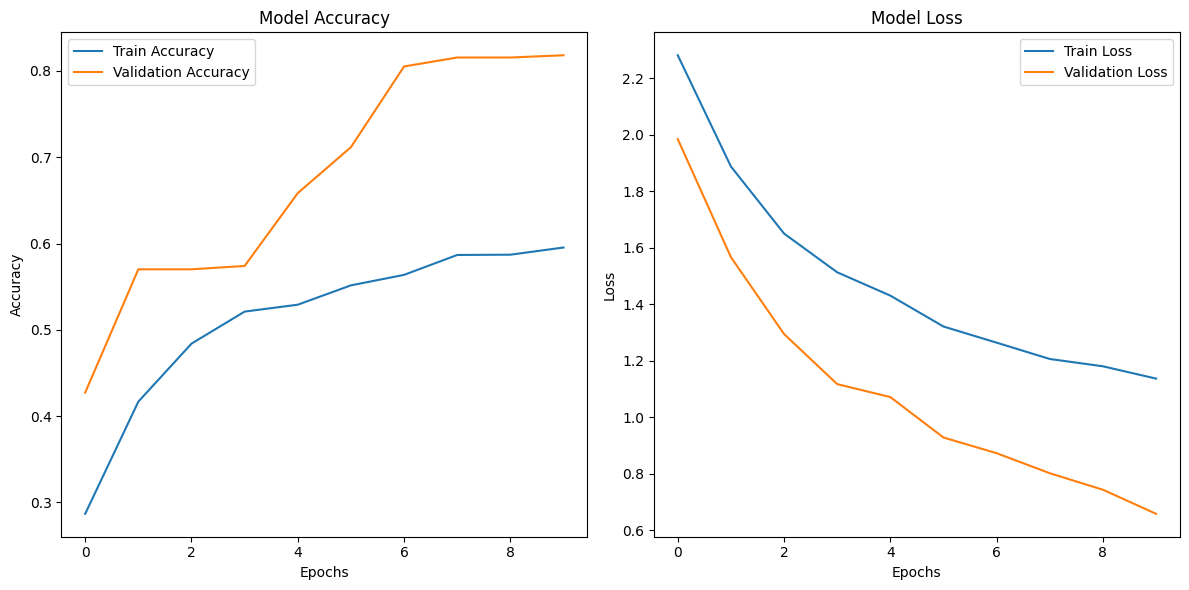

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

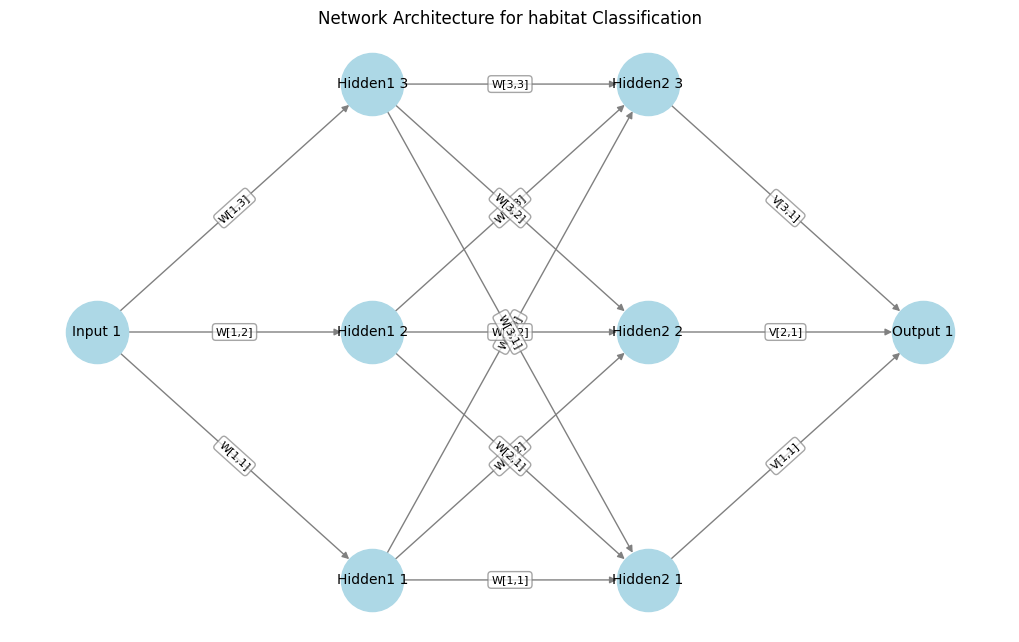

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_simplified_ann(title="Simplified ANN Architecture with Symbolic Weights"):
    """
    Plots a simplified neural network diagram with non-overlapping symbolic weights.
    """
    G = nx.DiGraph()

    # Input layer
    input_neurons = 1  # Symbolic input neurons
    for i in range(input_neurons):
        G.add_node(f"Input {i+1}", layer=0)

    # Hidden layer 1
    hidden1_neurons = 3  # Symbolic neurons for simplicity
    for h1 in range(hidden1_neurons):
        G.add_node(f"Hidden1 {h1+1}", layer=1)

    # Hidden layer 2
    hidden2_neurons = 3  # Symbolic neurons for simplicity
    for h2 in range(hidden2_neurons):
        G.add_node(f"Hidden2 {h2+1}", layer=2)

    # Output layer
    output_neurons = 1  # Symbolic output neurons
    for o in range(output_neurons):
        G.add_node(f"Output {o+1}", layer=3)

    # Add edges with symbolic weights between layers
    edge_labels = {}

    # Input to Hidden layer 1
    for i in range(input_neurons):
        for h1 in range(hidden1_neurons):
            edge_label = f"W[{i+1},{h1+1}]"
            G.add_edge(f"Input {i+1}", f"Hidden1 {h1+1}")
            edge_labels[(f"Input {i+1}", f"Hidden1 {h1+1}")] = edge_label

    # Hidden layer 1 to Hidden layer 2
    for h1 in range(hidden1_neurons):
        for h2 in range(hidden2_neurons):
            edge_label = f"W[{h1+1},{h2+1}]"
            G.add_edge(f"Hidden1 {h1+1}", f"Hidden2 {h2+1}")
            edge_labels[(f"Hidden1 {h1+1}", f"Hidden2 {h2+1}")] = edge_label

    # Hidden layer 2 to Output layer
    for h2 in range(hidden2_neurons):
        for o in range(output_neurons):
            edge_label = f"V[{h2+1},{o+1}]"
            G.add_edge(f"Hidden2 {h2+1}", f"Output {o+1}")
            edge_labels[(f"Hidden2 {h2+1}", f"Output {o+1}")] = edge_label

    # Define positions for a layered layout
    pos = {}
    layer_dist = 2  # Distance between layers
    node_dist = 1.5  # Distance between nodes

    # Input layer positions
    for i in range(input_neurons):
        pos[f"Input {i+1}"] = (0, i * node_dist - (input_neurons - 1) * node_dist / 2)

    # Hidden layer 1 positions
    for h1 in range(hidden1_neurons):
        pos[f"Hidden1 {h1+1}"] = (layer_dist, h1 * node_dist - (hidden1_neurons - 1) * node_dist / 2)

    # Hidden layer 2 positions
    for h2 in range(hidden2_neurons):
        pos[f"Hidden2 {h2+1}"] = (2 * layer_dist, h2 * node_dist - (hidden2_neurons - 1) * node_dist / 2)

    # Output layer positions
    for o in range(output_neurons):
        pos[f"Output {o+1}"] = (3 * layer_dist, o * node_dist - (output_neurons - 1) * node_dist / 2)

    # Plot the network
    plt.figure(figsize=(10, 6))
    nx.draw(
        G, pos, with_labels=True, node_color="lightblue", edge_color="gray",
        node_size=2000, font_size=10
    )

    # Draw edge labels for symbolic weights with adjusted positioning to avoid overlap
    nx.draw_networkx_edge_labels(
        G, pos, edge_labels=edge_labels, font_size=8,
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white", alpha=0.7),
        label_pos=0.5  # Place labels at the midpoint of the edges
    )

    plt.title(title)
    plt.show()

# Plot the simplified ANN architecture
plot_simplified_ann(title="Network Architecture for habitat Classification")
